<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to `pandas` Lab
___

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### A. Explore _Mad Men_ Cast Data

---

#### 1. Load the _Mad Men_ cast data into a `pandas` DataFrame.

In [2]:
cast_data_csv = '../../../../resource-datasets/mad_men_actors/mad-men-cast-show-data.csv'

In [3]:
cast = pd.read_csv(cast_data_csv, encoding='latin-1')

#### 2. Print the head and tail of the data.

In [4]:
# A:
cast.head()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


In [5]:
# A:
cast.tail()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
243,Meghan Wolfe,True Detective,2014,PRESENT,LEFT,2014,1,0,0,0,0.00,0,NaN,NaN,NaN
244,Kevin Dunn,True Detective,2014,PRESENT,LEFT,2014,1,0,1,2,2.25,2.25,NaN,"Draft Day, 2014","Veep, Season 3-4"
245,Charles Dance,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,2,1,1.50,#DIV/0!,NaN,"Woman in Gold, 2015; Child 44, 2015","Deadline Gallipoli, Season 1"
246,Patrick Dempsey,Grey's Anatomy,2005,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN
247,Ian McElhinney,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN


#### 3. Print the columns of the data.

In [6]:
# A:
cast.columns

Index(['Performer', 'Show', 'Show Start', 'Show End', 'Status?', 'CharEnd',
       'Years Since', '#LEAD', '#SUPPORT', '#Shows', 'Score', 'Score/Y',
       'lead_notes', 'support_notes', 'show_notes'],
      dtype='object')

#### 4. Rename the columns in such a way that no spaces or special symbols are contained.

Hint: Special symbols or spaces are not contained in the uppercase or lowercase letters.

In [7]:
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase


In [19]:
# A:
new_columns = []
for word in cast.columns:
    new_word = ''
    for letter in word:
        if letter in uppercase or letter in lowercase:
            new_word += letter
    new_columns.append(new_word)
new_columns    

cast.columns = new_columns

cast.columns

Index(['Performer', 'Show', 'ShowStart', 'ShowEnd', 'Status', 'CharEnd',
       'YearsSince', 'LEAD', 'SUPPORT', 'Shows', 'Score', 'ScoreY',
       'leadnotes', 'supportnotes', 'shownotes'],
      dtype='object')

#### 5. Subset the data where the status of the show is not "END" or "End".

In [21]:
# A:
cast[(cast['Status'] != 'END') & (cast['Status'] != 'End')]

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
157,Siobhan Finneran,Downton Abbey,2010,PRESENT,LEFT,2012,3,0,0,8,8.00,2.666666667,NaN,NaN,"The Syndicate, Season 2; Happy Valley, Season ..."
162,Eric Dane,Grey's Anatomy,2005,PRESENT,LEFT,2012,3,0,0,1,1.00,0.333333333,NaN,NaN,"The Last Ship, Season 1"
163,David Harewood,Homeland,2011,PRESENT,LEFT,2012,3,0,0,1,1.00,0.333333333,NaN,NaN,"Selfie, Season 1"
171,Dan Stevens,Downton Abbey,2010,PRESENT,LEFT,2012,3,3,4,0,4.00,1.333333333,"Summer in February, 2014; The Guest, 2014; Nig...","Vamps, 2012; The Fifth Estate, 2013; A Walk Am...",NaN
173,Michelle Fairley,Game of Thrones,2011,PRESENT,LEFT,2013,2,0,2,3,3.50,1.75,NaN,"Ironclad: Battle for Blood, 2014; Jack et la m...","Suits, Season 3; 24: Live Another Day, Season ..."
177,Morena Baccarin,Homeland,2011,PRESENT,LEFT,2013,2,1,0,2,3.00,1.5,"Back in the Day, 2014",NaN,"The Red Tent, Season 1; Gotham, Season 1"
178,Diego Klattenhoff,Homeland,2011,PRESENT,LEFT,2013,2,1,0,2,3.00,1.5,"Pacific Rim, 2013",NaN,"The Blacklist, Season 1-2"
179,Marg Helgenberger,CSI: Crime Scene Investigations,2000,PRESENT,LEFT,2013,2,0,0,1,1.00,0.5,NaN,NaN,"Intelligence, Season 1"
200,Jackson Pace,Homeland,2011,PRESENT,LEFT,2013,2,0,0,0,0.00,0,NaN,NaN,NaN
201,Morgan Saylor,Homeland,2011,PRESENT,LEFT,2013,2,0,2,0,0.50,0.25,NaN,"Jamie Marks is Dead, 2014; McFarland, USA, 2015",NaN


In [78]:
#Alternatively... do some version of isin
cast[cast['Status'].isin(['END','End'])]

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."
5,Camryn Manheim,The Practice,1997,2014,END,2004,11,0,4,5,6.00,0.545454545,"The Hot Flashes, 2013","Twisted, 2004; Dark Water, 2005; An Unfinished...","The Gosts Whisperer, Season 2-5; Extant, Season 1"
6,Steve Harris,The Practice,1997,2014,END,2004,11,0,2,3,3.50,0.318181818,NaN,"12 Rounds, 2009; Takers, 2010","Heist, Season 1; Awake, Season 1; Legends, Sea..."
7,Marla Sokoloff,The Practice,1997,2014,END,2004,11,0,1,1,1.25,0.113636364,NaN,"Play The Game, 2009","Big Day, Season 1;"
8,Jerry Orbach,Law & Order,1990,2010,END,2004,11,0,0,0,0.00,0,NaN,NaN,NaN
9,Michael Badalucco,The Practice,1997,2014,END,2004,11,0,1,0,0.25,0.022727273,NaN,"Bewitched, 2005",NaN


#### 6. Print out the performers where the show start is greater than 2005 and the score is greater than 7.

In [22]:
# A:
cast[(cast['ShowStart'] > 2005) & (cast['Score'] > 7)]

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
95,Scott Porter,Friday Night Lights,2006,2011,END,2010,5,3,1,6,9.25,1.85,"The Good Guy, 2010; 10 Years, 2012; The To Do ...","Dear John, 2010","The Good Wife, Season 2; X-Men, Season 1; Hear..."
132,Connie Britton,Friday Night Lights,2006,2011,END,2011,4,3,1,4,7.25,1.8125,"The Fitzgerald Family Christmas, 2012; Angels ...","The To Do List, 2013","American Horror Story, Season 1; Nashville, Se..."
149,Amanda Seyfried,Big Love,2006,2011,End,2011,4,8,3,0,8.75,2.1875,"Red Riding Hood, 2011; In Time, 2011; Gine, 20...","The End of Love, 2013; Veronica Mars, 2014; Wh...",NaN
157,Siobhan Finneran,Downton Abbey,2010,PRESENT,LEFT,2012,3,0,0,8,8.00,2.666666667,NaN,NaN,"The Syndicate, Season 2; Happy Valley, Season ..."


#### 7. Select the `performer` and `show` columns for the rows labeled 20 to 25.

In [23]:
# A:
cast.loc[20:25, ['Performer','Show']]

,Performer,Show
20,Mary Steenburgen,Joan of Arcadia
21,Mathew St. Patrick,Six Feet Under
22,Michael Welch,Joan of Arcadia
23,Aaron Himelstein,Joan of Arcadia
24,Becky Wahlstrom,Joan of Arcadia
25,Chris Marquette,Joan of Arcadia


#### 8. Plot a histogram of score.

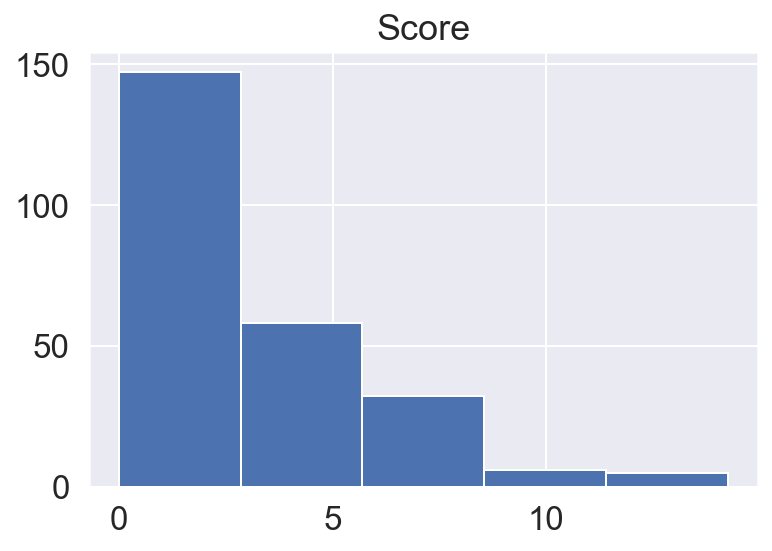

In [30]:
# A: 
cast.hist('Score', bins = 5);

### B. Explore San Francisco Crime Data

--- 

**9. Load the San Francisco crime data set into a DataFrame.**

In [8]:
crime_csv = '../../../../resource-datasets/sf_crime/sf_crime_sample.csv'

In [9]:
# A:
crime = pd.read_csv(crime_csv)

**10. Look at the dimensions of the crime data.**

In [33]:
# A:
crime.shape

(25000, 9)

**11. Look at the data types of the columns and print out the column names.**

In [39]:
# A:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
Dates         25000 non-null object
Category      25000 non-null object
Descript      25000 non-null object
DayOfWeek     25000 non-null object
PdDistrict    25000 non-null object
Resolution    25000 non-null object
Address       25000 non-null object
X             25000 non-null float64
Y             25000 non-null float64
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


In [50]:
# A:
crime.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

**12. How many distinct districts are there?**

Hint: You can use the command `.unique()` on any pandas series.

In [81]:
# A:
#unique only works on series not on dataframe so not crime[['PdDistrict']]

crime['PdDistrict'].unique()

array(['BAYVIEW', 'NORTHERN', 'SOUTHERN', 'TARAVAL', 'MISSION',
       'INGLESIDE', 'CENTRAL', 'TENDERLOIN', 'RICHMOND', 'PARK'],
      dtype=object)

**13. Which day of the week has the most crime?**

In [84]:
crime.DayOfWeek.value_counts()

AttributeError: 'str' object has no attribute 'DayOfWeek'

In [61]:
# A:
crime.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,25000,25000,25000,25000,25000,25000,25000,25000.000000,25000.000000
unique,23859,38,563,7,10,16,8746,NaN,NaN
top,2013-07-24 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,5,4934,1656,3883,4413,14880,766,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422454,37.773486
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032753,0.572667
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.708003
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432797,37.752874
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416469,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406953,37.784401


#### 14. Make a new DataFrame featuring the crime categories and the number of crimes per category.

In [72]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


In [10]:
# A:

# Create a list with the categories
category_list = crime.Category.value_counts().index
#or... category_list = crime.Category.unique()

# Create a list with counts per category
category_counts = crime.Category.value_counts().values
#or... category_counts =[crime[crime['Category'] == cat].shape[0] for cat in categories]


In [11]:
# Create dataframe from dictionary

crime_category = pd.DataFrame({'category':category_list, 'counts':category_counts})
crime_category

,category,counts
0,LARCENY/THEFT,4934
1,OTHER OFFENSES,3656
2,NON-CRIMINAL,2601
3,ASSAULT,2164
4,DRUG/NARCOTIC,1533
5,VEHICLE THEFT,1506
6,VANDALISM,1280
7,WARRANTS,1239
8,BURGLARY,1023
9,SUSPICIOUS OCC,891


**15. Make a DataFrame that includes the districts and crime counts per district. Which district has the most crime?**

*Hint: You can use the `.sort_values()` function to sort your DataFrame by column.*

In [91]:
# A:
districts = crime.PdDistrict.unique()

crime_district = pd.DataFrame({'district':crime.PdDistrict.unique(),
                               'counts':[crime[crime['PdDistrict'] == dist].shape[0] for dist in districts]})
crime_district.sort_values(by='counts', ascending=False)

,district,counts
2,SOUTHERN,4413
4,MISSION,3416
1,NORTHERN,3076
0,BAYVIEW,2555
6,CENTRAL,2424
7,TENDERLOIN,2336
5,INGLESIDE,2256
3,TARAVAL,1804
9,PARK,1438
8,RICHMOND,1282


In [89]:
#or.. 
crime.PdDistrict.value_counts(sort=True)

SOUTHERN      4413
MISSION       3416
NORTHERN      3076
BAYVIEW       2555
CENTRAL       2424
TENDERLOIN    2336
INGLESIDE     2256
TARAVAL       1804
PARK          1438
RICHMOND      1282
Name: PdDistrict, dtype: int64